In [23]:
import sys
!{sys.executable} -m pip install seaborn --user

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
match=pd.read_csv('D:\Data Science\IPL\Dataset\matches.csv')

In [26]:
match.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [27]:
delivery=pd.read_csv('D:\Data Science\IPL\Dataset\deliveries.csv')

In [28]:
delivery.head(5)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [29]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [30]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [31]:
#List of all the participating teams
all_teams = match['team1'].tolist() + match['team2'].tolist()
all_teams = list(set(all_teams))
all_teams

['Chennai Super Kings',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Mumbai Indians',
 'Kochi Tuskers Kerala',
 'Rising Pune Supergiant',
 'Gujarat Lions',
 'Rising Pune Supergiants',
 'Deccan Chargers',
 'Pune Warriors',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Rajasthan Royals',
 'Delhi Daredevils']

In [32]:
#Eliminator
match['eliminator'].value_counts()

#graphical view
sns.countplot(x='eliminator', data=match)

<Axes: xlabel='eliminator', ylabel='count'>

In [34]:
pip install --user matplotlib

Note: you may need to restart the kernel to use updated packages.


In [35]:
#List of all the participating teams
all_teams = match['team1'].tolist() + match['team2'].tolist()
all_teams = list(set(all_teams))
all_teams

['Chennai Super Kings',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Mumbai Indians',
 'Kochi Tuskers Kerala',
 'Rising Pune Supergiant',
 'Gujarat Lions',
 'Rising Pune Supergiants',
 'Deccan Chargers',
 'Pune Warriors',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Rajasthan Royals',
 'Delhi Daredevils']

In [39]:
#Eliminator
match['eliminator'].value_counts()

#graphical view
sns.countplot(x='eliminator', data=match)

<Axes: xlabel='eliminator', ylabel='count'>

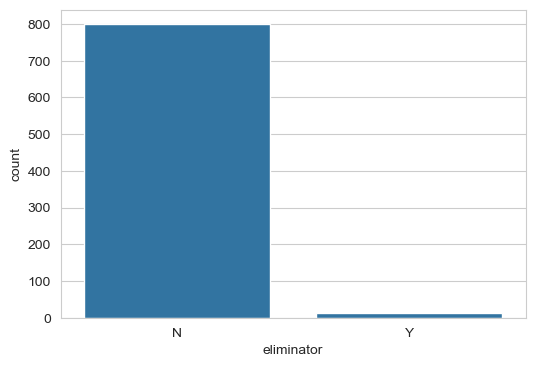

In [41]:
plt.clf()
plt.close()
plt.figure(figsize=(6,4))
sns.countplot(x='eliminator', data=match)
plt.show()

In [43]:
#Number of matches per venue
sns.countplot(x='venue', data=match)
plt.xticks(rotation='vertical')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'M Chinnaswamy Stadium'),
  Text(1, 0, 'Punjab Cricket Association Stadium, Mohali'),
  Text(2, 0, 'Feroz Shah Kotla'),
  Text(3, 0, 'Wankhede Stadium'),
  Text(4, 0, 'Eden Gardens'),
  Text(5, 0, 'Sawai Mansingh Stadium'),
  Text(6, 0, 'Rajiv Gandhi International Stadium, Uppal'),
  Text(7, 0, 'MA Chidambaram Stadium, Chepauk'),
  Text(8, 0, 'Dr DY Patil Sports Academy'),
  Text(9, 0, 'Newlands'),
  Text(10, 0, "St George's Park"),
  Text(11, 0, 'Kingsmead'),
  Text(12, 0, 'SuperSport Park'),
  Text(13, 0, 'Buffalo Park'),
  Text(14, 0, 'New Wanderers Stadium'),
  Text(15, 0, 'De Beers Diamond Oval'),
  Text(16, 0, 'OUTsurance Oval'),
  Text(17, 0, 'Brabourne Stadium'),
  Text(18, 0, 'Sardar Patel Stadium, Motera'),
  Text(19, 0, 'Barabati Stadium'),
  Text(20, 0, 'Vid

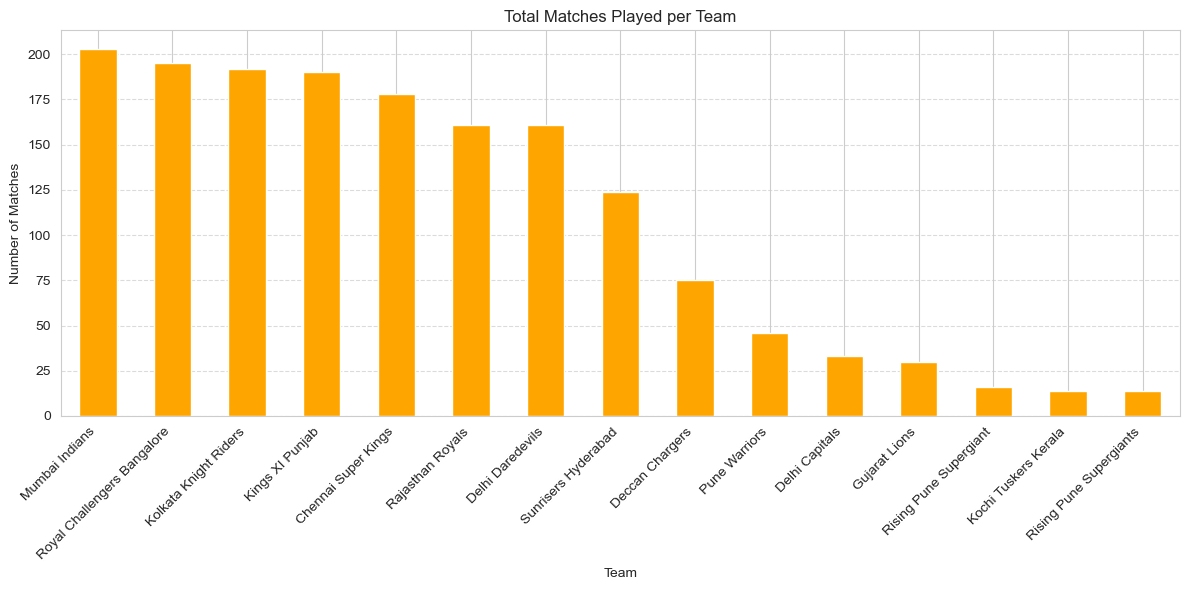

In [45]:
# Count how many times each team appears as team1 and team2
team1_counts = match['team1'].value_counts()
team2_counts = match['team2'].value_counts()

# Combine the counts
total_matches = team1_counts.add(team2_counts, fill_value=0).astype(int)

# Sort (optional)
total_matches = total_matches.sort_values(ascending=False)

# Plot vertical bar chart
plt.figure(figsize=(12, 6))
total_matches.plot(kind='bar', color='orange')
plt.title('Total Matches Played per Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [46]:
#Match won by each team
x=pd.DataFrame({"Winner":match['winner']}).value_counts()
print(x)

Winner                     
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


C:\Users\chinm\AppData\Local\Temp\ipykernel_31384\3532391302.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='winner', data=match, palette='Set3')


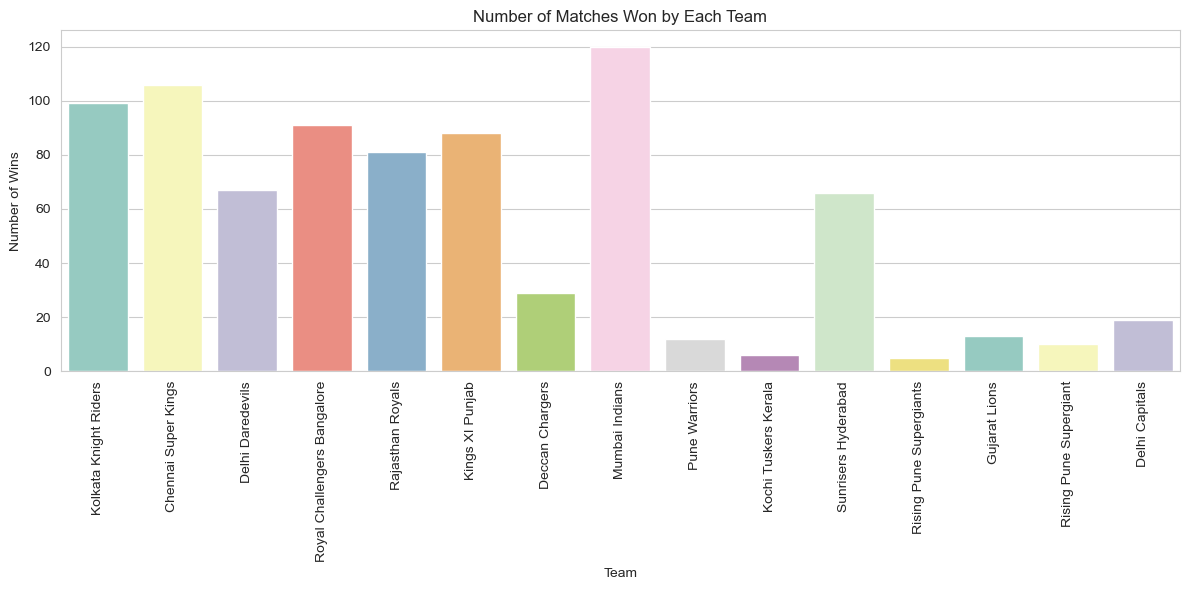

In [47]:
# Set figure size
plt.figure(figsize=(12, 6))

# Plot count of match winners
sns.countplot(x='winner', data=match, palette='Set3')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

# Add titles and labels
plt.title('Number of Matches Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')

# Optional: layout fix
plt.tight_layout()

# Show plot
plt.show()

C:\Users\chinm\AppData\Local\Temp\ipykernel_31384\3375725116.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='winner', data=eliminator_matches, palette='pastel')


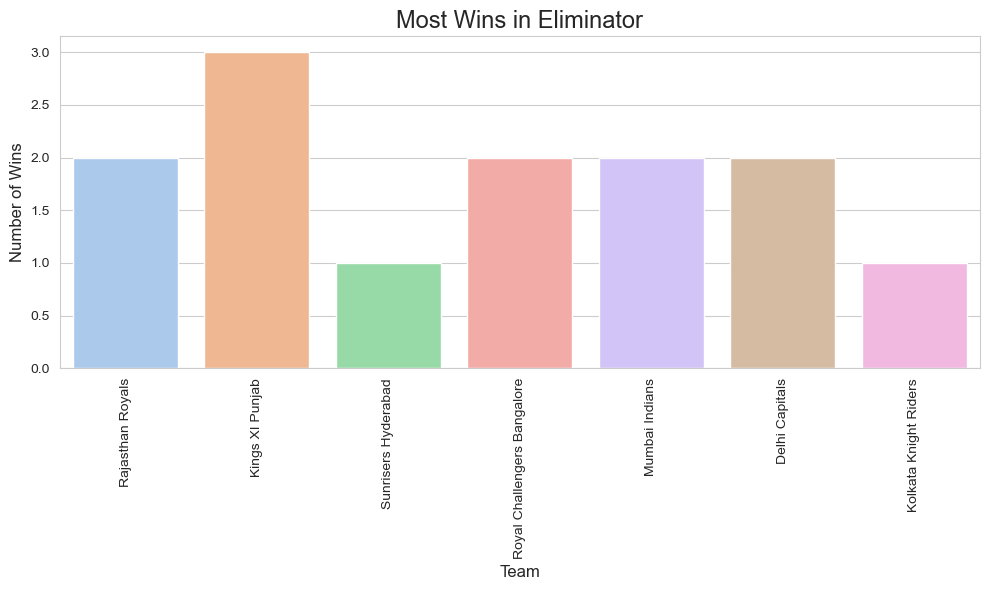

In [48]:
# Filter only eliminator matches
eliminator_matches = match[match['eliminator'] == 'Y']

# Set figure size
plt.figure(figsize=(10, 6))

# Countplot of winners in eliminator
sns.countplot(x='winner', data=eliminator_matches, palette='pastel')

# Add titles and labels
plt.title("Most Wins in Eliminator", fontsize=17)
plt.xlabel("Team", fontsize=12)
plt.ylabel("Number of Wins", fontsize=12)

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

# Improve layout
plt.tight_layout()

# Show plot
plt.show()

C:\Users\chinm\AppData\Local\Temp\ipykernel_31384\1058642048.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.index, y=top_players.values, palette='viridis')


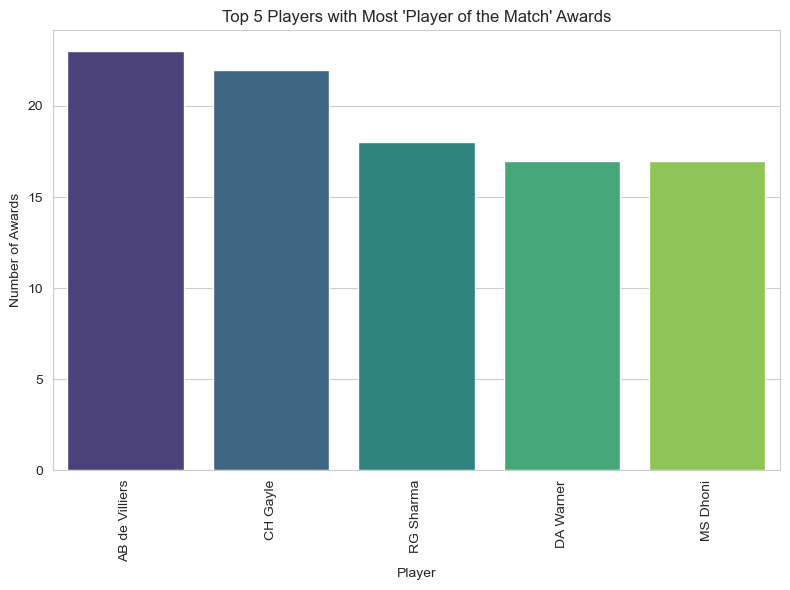

In [50]:
# Get top 5 players by player_of_match awards
top_players = match['player_of_match'].value_counts().head()

# Set figure size
plt.figure(figsize=(8, 6))

# Barplot using the top_players Series directly
sns.barplot(x=top_players.index, y=top_players.values, palette='viridis')

# Add titles and labels
plt.title("Top 5 Players with Most 'Player of the Match' Awards")
plt.xlabel("Player")
plt.ylabel("Number of Awards")
plt.xticks(rotation=90)

# Layout fix
plt.tight_layout()

# Show the plot
plt.show()

In [51]:
#About delivery
delivery.shape

(193468, 18)

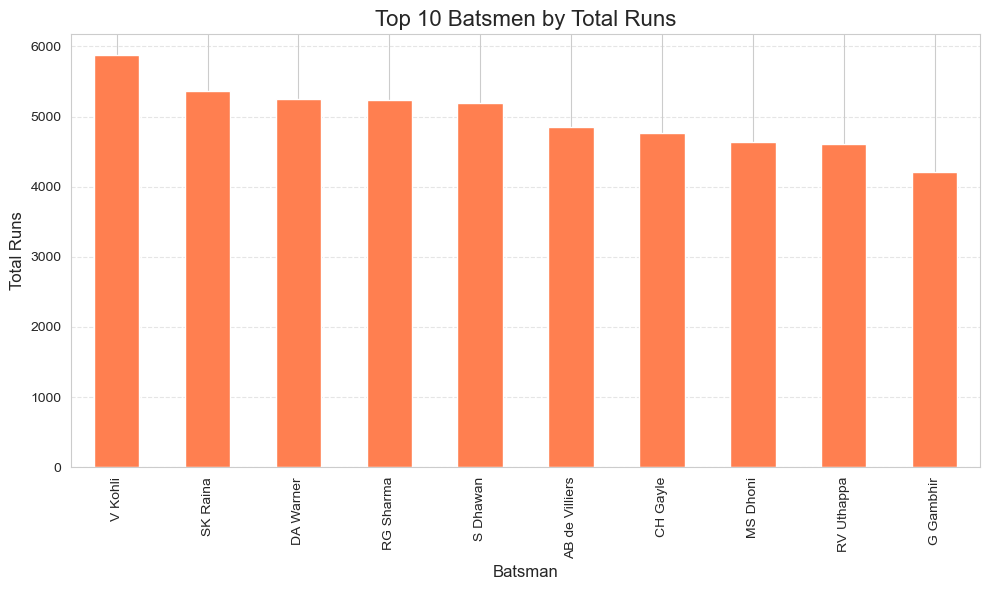

In [52]:
# Group, sum, sort, and get top 10 batsmen
top_batsman = (
    delivery.groupby('batsman')['batsman_runs']
    .sum()
    .reset_index()
    .sort_values('batsman_runs', ascending=False)
    .head(10)
)

# Set batsman as index
top_batsman.set_index('batsman', inplace=True)

# Plot vertical bar chart
plt.figure(figsize=(10, 6))
top_batsman['batsman_runs'].plot(kind='bar', color='coral')

# Titles and labels
plt.title('Top 10 Batsmen by Total Runs', fontsize=16)
plt.xlabel('Batsman', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

# Grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Avoid cutting off labels
plt.tight_layout()

# Show plot
plt.show()

In [53]:
delivery.groupby('bowler')['total_runs'].agg('sum').reset_index().sort_values('total_runs', ascending=False).head(10)

,bowler,total_runs
276,PP Chawla,4330
133,Harbhajan Singh,4038
6,A Mishra,3913
99,DJ Bravo,3869
281,R Ashwin,3756
396,UT Yadav,3672
293,RA Jadeja,3515
350,SL Malinga,3486
264,P Kumar,3342
57,B Kumar,3333


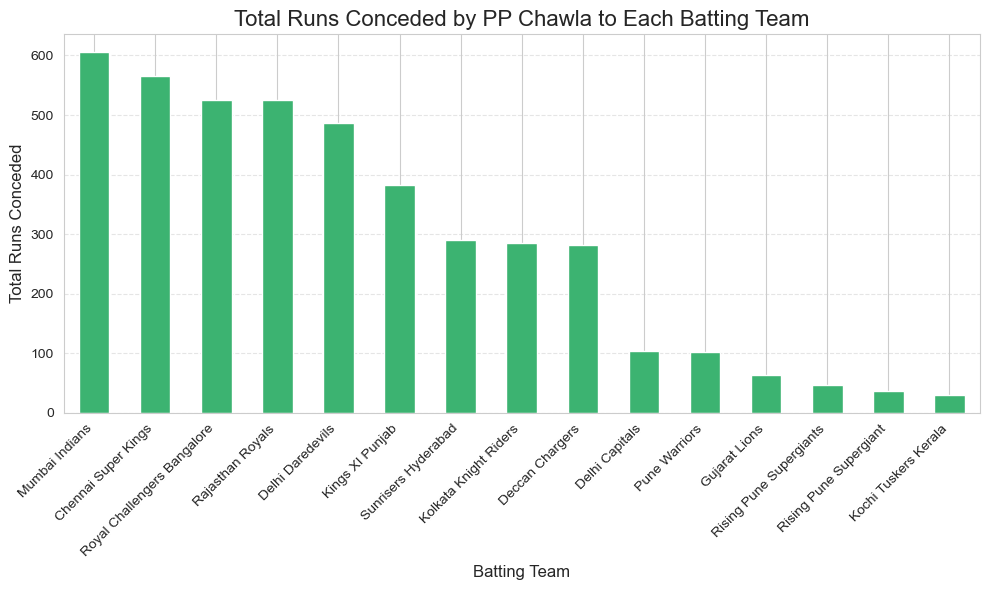

In [54]:
# Filter deliveries bowled by PP Chawla
mask = delivery['bowler'] == 'PP Chawla'
chawla_data = delivery[mask]

# Group by batting_team and sum runs
runs_conceded = chawla_data.groupby('batting_team')['total_runs'].sum()

# Optional: sort teams by runs conceded (descending) for better plot
runs_conceded = runs_conceded.sort_values(ascending=False)

# Plot vertical bar chart
plt.figure(figsize=(10, 6))
runs_conceded.plot(kind='bar', color='mediumseagreen')

# Titles and axis labels
plt.title('Total Runs Conceded by PP Chawla to Each Batting Team', fontsize=16)
plt.xlabel('Batting Team', fontsize=12)
plt.ylabel('Total Runs Conceded', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

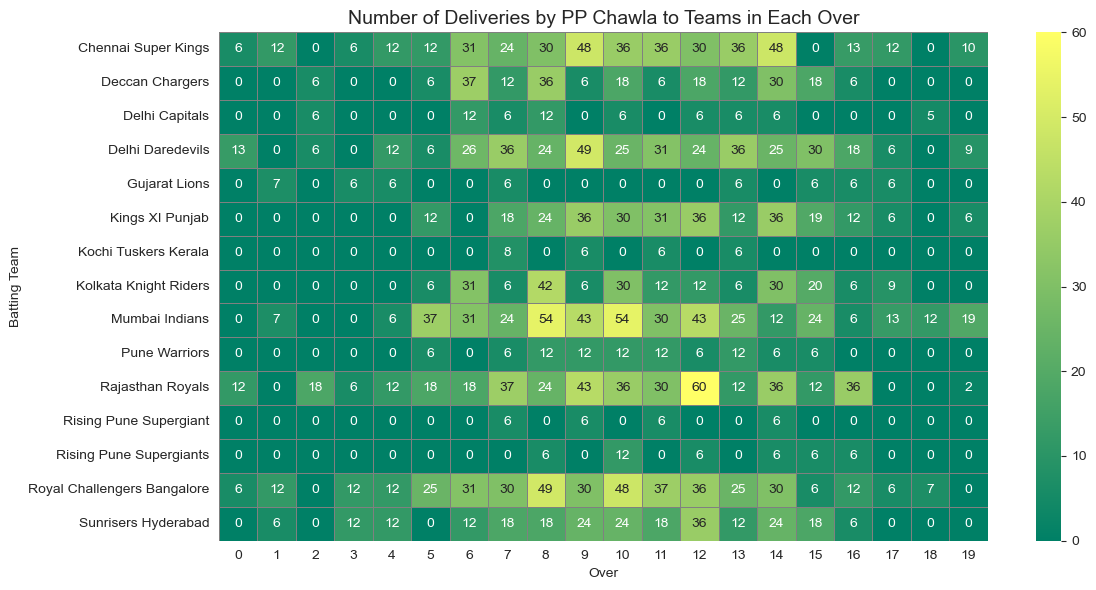

In [55]:
# Filter deliveries by PP Chawla
mask = delivery['bowler'] == 'PP Chawla'
delivery6 = delivery[mask][['batting_team', 'over', 'batsman_runs']]

# Create pivot table: count of deliveries in each over per batting team
pivot_data = delivery6.pivot_table(values='batsman_runs', index='batting_team', columns='over', aggfunc='count', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap='summer', linewidths=0.5, linecolor='gray', annot=True, fmt='d')

# Titles and labels
plt.title('Number of Deliveries by PP Chawla to Teams in Each Over', fontsize=14)
plt.xlabel('Over')
plt.ylabel('Batting Team')

# Layout fix
plt.tight_layout()
plt.show()

C:\Users\chinm\AppData\Local\Temp\ipykernel_31384\1047489700.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dismissal_kind', data=delivery, palette='Set2')


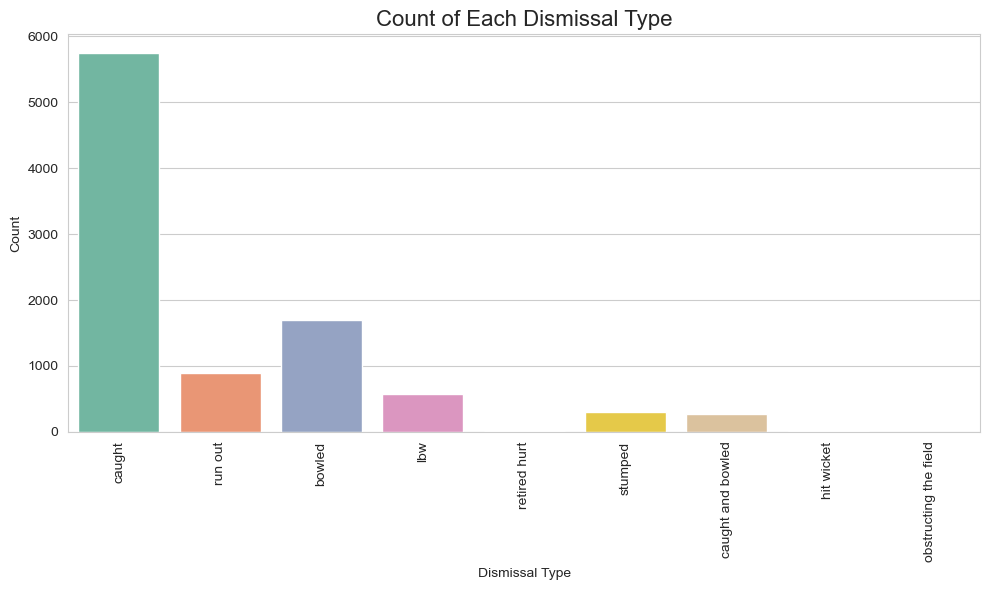

In [56]:
# Set figure size
plt.figure(figsize=(10, 6))

# Countplot of dismissal kinds
sns.countplot(x='dismissal_kind', data=delivery, palette='Set2')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

# Add title and labels
plt.title('Count of Each Dismissal Type', fontsize=16)
plt.xlabel('Dismissal Type')
plt.ylabel('Count')

# Layout fix
plt.tight_layout()

# Show plot
plt.show()

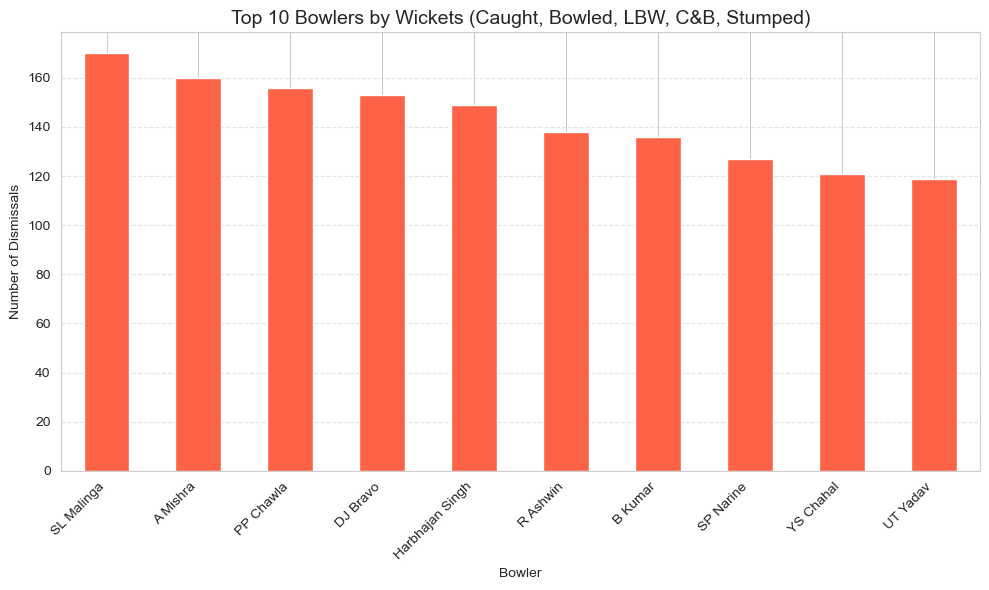

In [57]:

# Create a mask for common wicket types
wicket_kinds = ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped']
new_del = delivery[delivery['dismissal_kind'].isin(wicket_kinds)]

# Group by bowler and count dismissals
top_wicket_takers = (
    new_del.groupby('bowler')['player_dismissed']
    .count()
    .sort_values(ascending=False)
    .head(10)
)

# Plot vertical bar chart
plt.figure(figsize=(10, 6))
top_wicket_takers.plot(kind='bar', color='tomato')

# Add title and axis labels
plt.title('Top 10 Bowlers by Wickets (Caught, Bowled, LBW, C&B, Stumped)', fontsize=14)
plt.xlabel('Bowler')
plt.ylabel('Number of Dismissals')
plt.xticks(rotation=45, ha='right')

# Add grid and layout fixes
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

In [58]:
mask=delivery['bowler']=='JJ Bumrah'
mask2=delivery['batsman']=='V Kohli'
delivery[mask].groupby('batsman')['batsman_runs'].agg('count').sort_values(ascending=False)['V Kohli']

np.int64(79)

C:\Users\chinm\AppData\Local\Temp\ipykernel_31384\3349063935.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batsman', y='batsman_runs', data=temp_df, palette='Oranges')


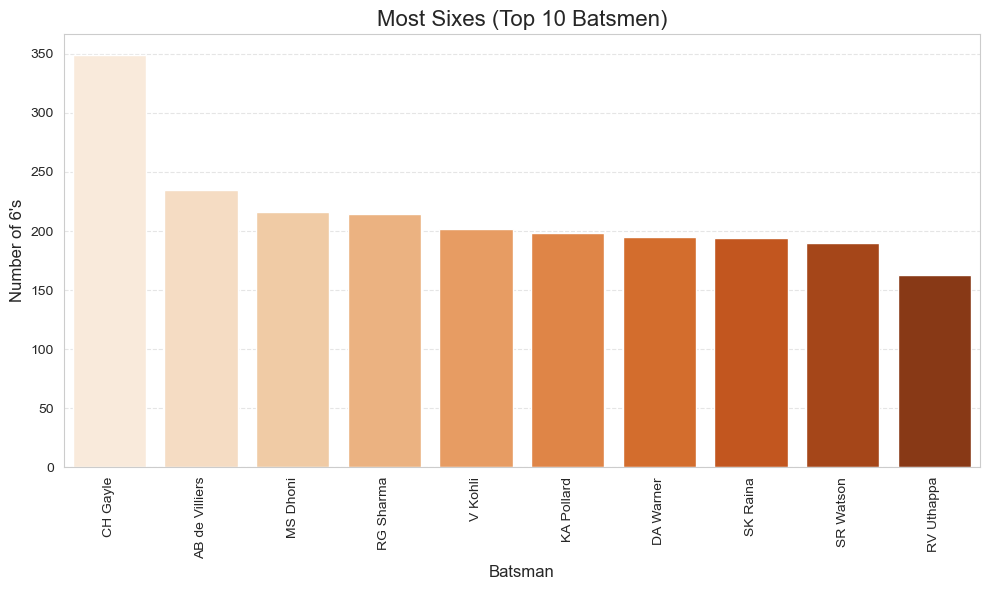

In [59]:
# Create the DataFrame of top 10 six-hitters
temp_df = (
    delivery
    .groupby('batsman')['batsman_runs']
    .agg(lambda x: (x == 6).sum())
    .reset_index()
    .sort_values(by='batsman_runs', ascending=False)
    .head(10)
    .reset_index(drop=True)
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='batsman', y='batsman_runs', data=temp_df, palette='Oranges')

# Titles and labels
plt.title("Most Sixes (Top 10 Batsmen)", fontsize=16)
plt.xlabel("Batsman", fontsize=12)
plt.ylabel("Number of 6's", fontsize=12)
plt.xticks(rotation=90)

# Gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Layout fix
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\chinm\AppData\Local\Temp\ipykernel_31384\2064002124.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bowler', y='is_wicket', data=temp_df, palette='crest')


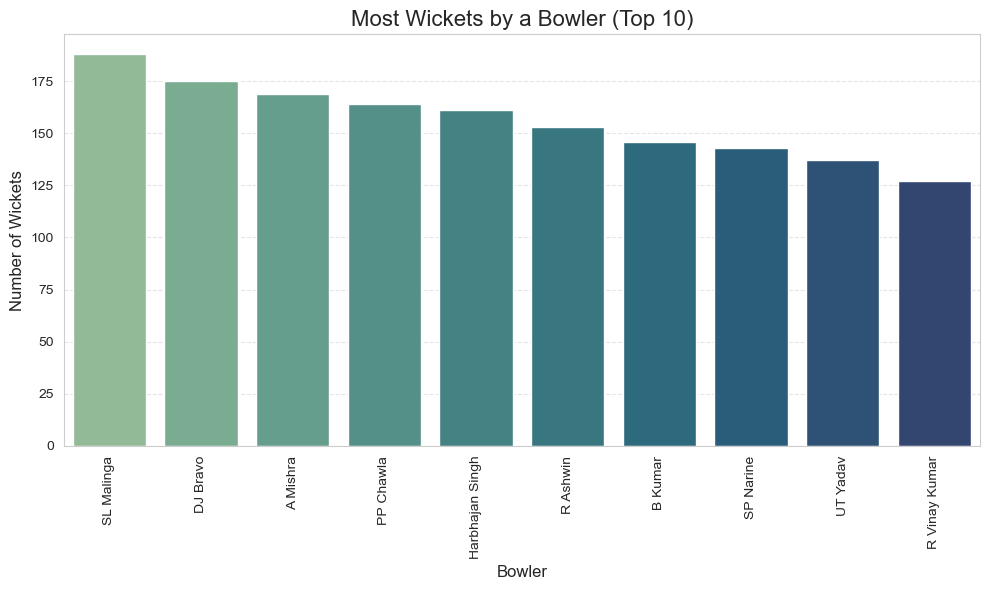

In [60]:

# Aggregate wickets per bowler and get top 10
temp_df = (
    delivery.groupby('bowler')['is_wicket']
    .sum()
    .reset_index()
    .sort_values(by='is_wicket', ascending=False)
    .head(10)
    .reset_index(drop=True)
)

# Plot vertical bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='bowler', y='is_wicket', data=temp_df, palette='crest')

# Titles and labels
plt.title("Most Wickets by a Bowler (Top 10)", fontsize=16)
plt.xlabel("Bowler", fontsize=12)
plt.ylabel("Number of Wickets", fontsize=12)

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

# Add grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Avoid label cut-off
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\chinm\AppData\Local\Temp\ipykernel_31384\2597691092.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='venue', data=match, palette='viridis')


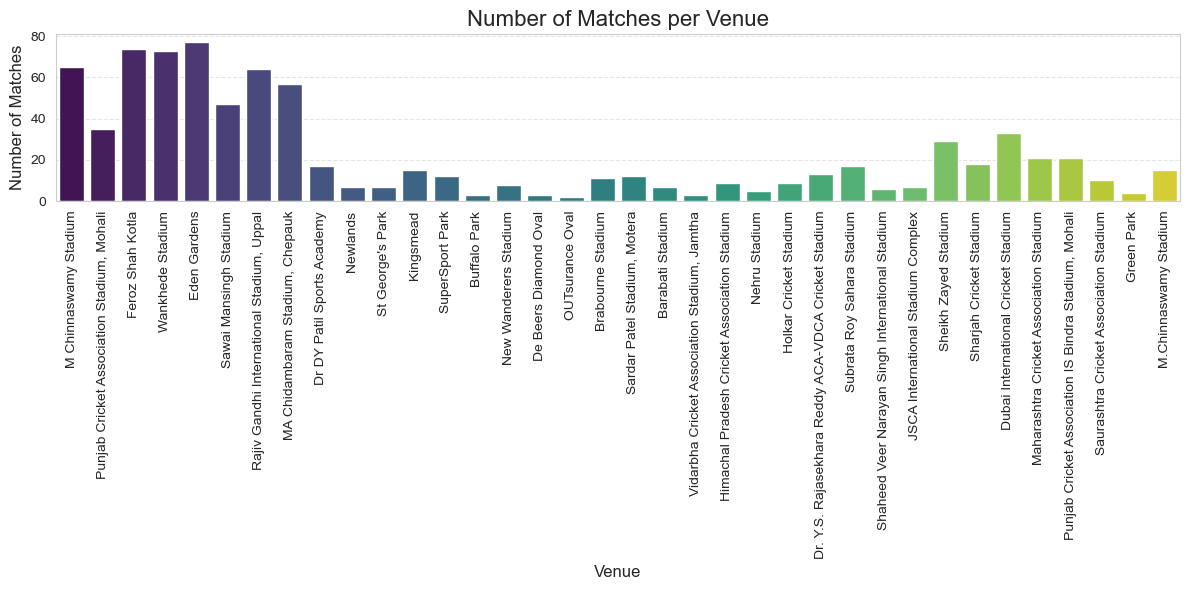

In [61]:
# Set figure size
plt.figure(figsize=(12, 6))

# Countplot of matches per venue
sns.countplot(x='venue', data=match, palette='viridis')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

# Add title and axis labels
plt.title('Number of Matches per Venue', fontsize=16)
plt.xlabel('Venue', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)

# Add grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Fix layout to avoid label cutoff
plt.tight_layout()

# Show the plot
plt.show()